# Machine Learning: Unsupervised Learning: Clustering: GMM

In [1]:
import numpy as np
rng = np.random.RandomState(3)

from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=500, centers=10, random_state=rng, cluster_std=[rng.gamma(1.5) for i in range(10)])

In [2]:
X.shape # 2D data set

(500, 2)

In [3]:
X[1:5]

array([[ 8.3570912 ,  8.07117765],
       [-2.72476068, -5.38043952],
       [-1.27001645, -5.73009102],
       [-1.82256079, -0.9063806 ]])

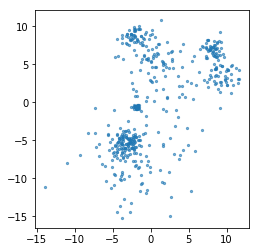

In [4]:
import matplotlib.pyplot as plt
% matplotlib inline

plt.scatter(X[:, 0], X[:, 1], s=5, alpha=.6)
plt.gca().set_aspect("equal")

xlim = plt.xlim()
ylim = plt.ylim()

* specify the number of components

    * n_components=3

In [5]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3)
gmm.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [6]:
print(gmm.means_)

[[ 8.68498099  5.20553679]
 [-2.28590079 -4.67421676]
 [-0.37685321  6.94733869]]


In [7]:
print(gmm.covariances_)

[[[ 1.48127404 -1.0995123 ]
  [-1.0995123   4.19122603]]

 [[ 6.65149612  2.06612209]
  [ 2.06612209 13.75935857]]

 [[ 5.46730275 -3.34074938]
  [-3.34074938  4.66638995]]]


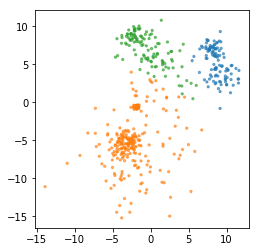

In [8]:
assignment = gmm.predict(X)

import matplotlib.pyplot as plt
% matplotlib inline

plt.scatter(X[:, 0], X[:, 1], s=5, alpha=.6, c=plt.cm.tab10(assignment))
plt.gca().set_aspect("equal")

* in GMM we model **covariance**

    * blue cluster (aka blue component) shows a different **spread** compared to the  green component (which "k means" can not)

# Probability Estimates

* gmm.predict_proba

    * probability of a point belonging to each of the component Gaussian distributions
    * for a given point, the posterior of which component Gaussian distributions it was probably generated from
    * given three Gaussian, which Gaussian is it likely to come from    

In [9]:
xs = np.linspace(xlim[0], xlim[1], 1000)
ys = np.linspace(ylim[0], ylim[1], 1000)
xx, yy = np.meshgrid(xs, ys)
pred = gmm.predict_proba(np.c_[xx.ravel(), yy.ravel()])
pred # each row will sum to 100%

array([[1.04769501e-177, 1.00000000e+000, 1.95154213e-090],
       [2.00138005e-177, 1.00000000e+000, 2.47969011e-090],
       [3.82112030e-177, 1.00000000e+000, 3.15035456e-090],
       ...,
       [9.34122872e-001, 6.58771284e-002, 1.97198858e-013],
       [9.28703332e-001, 7.12966681e-002, 1.93365595e-013],
       [9.22836467e-001, 7.71635327e-002, 1.89585383e-013]])

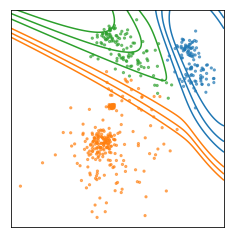

In [10]:
plt.scatter(X[:, 0], X[:, 1], s=5, alpha=.6, c=plt.cm.tab10(assignment))
plt.gca().set_aspect("equal")
plt.xticks(())
plt.yticks(())
levels = [.9, .99, .999, 1]

for color, component in zip(range(3), pred.T):
    plt.contour(xx, yy, component.reshape(xx.shape), colors=[plt.cm.tab10(color)], levels=levels)

* for a blue point in the middle of the blue contours, the point has a probability of ONE for being from the blue component Gaussian distribution and a near ZERO probability for being from the other two component Gaussian distributions.

# Probability Estimates: utilise full model

In [11]:
# log probability under the model
# i.e. per-sample average log-likelihood of the given data X
# i.e. computed log probabilities of each point in the input data
gmm.score(X)

-5.508383131660925

In [12]:
# weighted log probabilities for each sample
gmm.score_samples(X).shape

(500,)

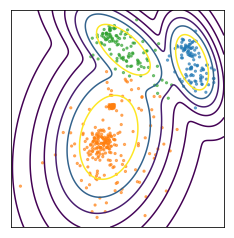

In [13]:
scores = gmm.score_samples(np.c_[xx.ravel(), yy.ravel()])
plt.scatter(X[:, 0], X[:, 1], s=5, alpha=.6, c=plt.cm.tab10(assignment))
plt.gca().set_aspect("equal")
plt.xticks(())
plt.yticks(())
scores = np.exp(scores)
plt.contour(xx, yy, scores.reshape(xx.shape), levels=np.percentile(scores, np.linspace(0, 100, 8))[1:-1])